# 04 분류하는 뉴런을 만듭니다

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/do-it-dl/blob/master/Ch04.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/do-it-dl/blob/master/Ch04.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## 04-2 시그모이드 함수를 알아봅니다

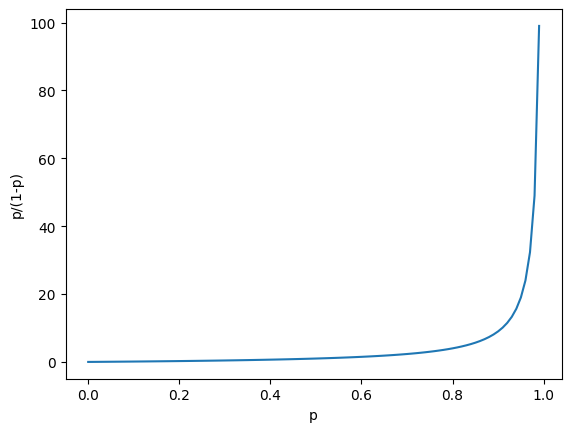

In [51]:
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

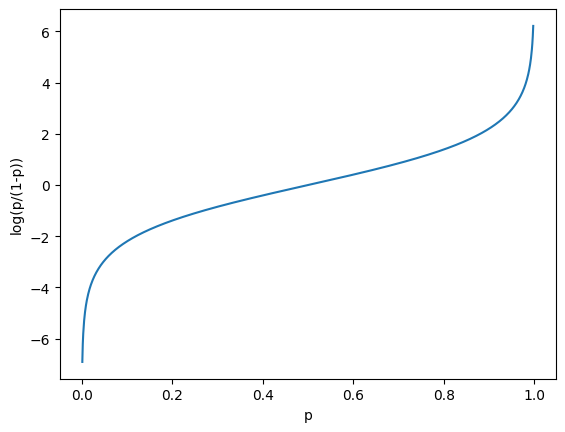

In [52]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

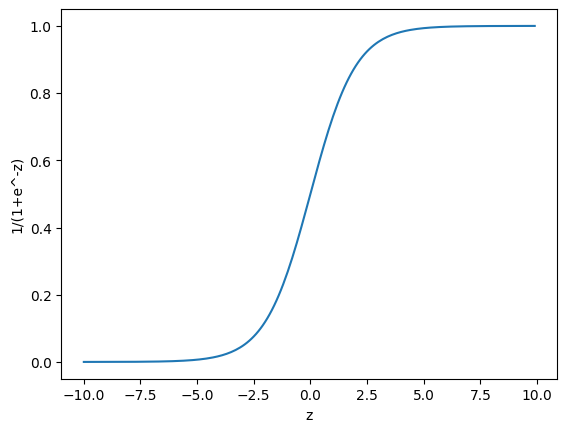

In [53]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

## 04-4 분류용 데이터셋을 준비합니다

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [55]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [57]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

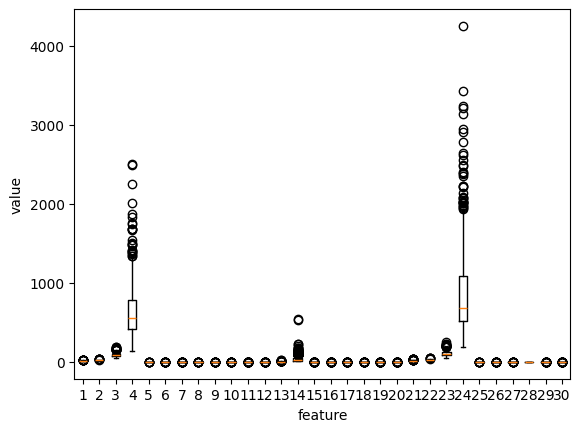

In [58]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [59]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [60]:
# unipue 함수로 고유한 값을 반환 return counts=True 로 고유한 값 등장횟수까지 반환
np.unique(cancer.target, return_counts=True)
# 0: 음성(그냥 종양) 1:양성 (악성 종양)

(array([0, 1]), array([212, 357]))

In [61]:
x = cancer.data
y = cancer.target

## 04-5 로지스틱 회귀로 모델을 만들어봅니다

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

In [64]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [65]:
x_train[0]

array([1.032e+01, 1.635e+01, 6.531e+01, 3.249e+02, 9.434e-02, 4.994e-02,
       1.012e-02, 5.495e-03, 1.885e-01, 6.201e-02, 2.104e-01, 9.670e-01,
       1.356e+00, 1.297e+01, 7.086e-03, 7.247e-03, 1.012e-02, 5.495e-03,
       1.560e-02, 2.606e-03, 1.125e+01, 2.177e+01, 7.112e+01, 3.849e+02,
       1.285e-01, 8.842e-02, 4.384e-02, 2.381e-02, 2.681e-01, 7.399e-02])

In [66]:
x_train[1]

array([2.018e+01, 1.954e+01, 1.338e+02, 1.250e+03, 1.133e-01, 1.489e-01,
       2.133e-01, 1.259e-01, 1.724e-01, 6.053e-02, 4.331e-01, 1.001e+00,
       3.008e+00, 5.249e+01, 9.087e-03, 2.715e-02, 5.546e-02, 1.910e-02,
       2.451e-02, 4.005e-03, 2.203e+01, 2.507e+01, 1.460e+02, 1.479e+03,
       1.665e-01, 2.942e-01, 5.308e-01, 2.173e-01, 3.032e-01, 8.075e-02])

In [67]:
y_train[0]

np.int64(1)

In [68]:
y_train[1]

np.int64(0)

In [69]:
x_train[:2]

array([[1.032e+01, 1.635e+01, 6.531e+01, 3.249e+02, 9.434e-02, 4.994e-02,
        1.012e-02, 5.495e-03, 1.885e-01, 6.201e-02, 2.104e-01, 9.670e-01,
        1.356e+00, 1.297e+01, 7.086e-03, 7.247e-03, 1.012e-02, 5.495e-03,
        1.560e-02, 2.606e-03, 1.125e+01, 2.177e+01, 7.112e+01, 3.849e+02,
        1.285e-01, 8.842e-02, 4.384e-02, 2.381e-02, 2.681e-01, 7.399e-02],
       [2.018e+01, 1.954e+01, 1.338e+02, 1.250e+03, 1.133e-01, 1.489e-01,
        2.133e-01, 1.259e-01, 1.724e-01, 6.053e-02, 4.331e-01, 1.001e+00,
        3.008e+00, 5.249e+01, 9.087e-03, 2.715e-02, 5.546e-02, 1.910e-02,
        2.451e-02, 4.005e-03, 2.203e+01, 2.507e+01, 1.460e+02, 1.479e+03,
        1.665e-01, 2.942e-01, 5.308e-01, 2.173e-01, 3.032e-01, 8.075e-02]])

In [70]:
x_train.dtype

dtype('float64')

In [71]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [72]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72]))

In [73]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x): # x.shape (30,)
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0                        # 절편을 초기화합니다.
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
                err = -(y_i - a)          # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5

In [74]:
x.shape

(569, 30)

In [75]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [76]:
a + b

array([4, 6, 8])

In [77]:
a * b

array([ 3,  8, 15])

In [78]:
np.sum(a * b)

np.int64(26)

In [79]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [80]:
np.full((2,3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

In [81]:
np.c_[np.zeros((2,3)), np.ones((2,3))]

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [82]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [83]:
np.mean(neuron.predict(x_test) == y_test)

np.float64(0.8245614035087719)

In [84]:
x_test[0]

array([1.955e+01, 2.877e+01, 1.336e+02, 1.207e+03, 9.260e-02, 2.063e-01,
       1.784e-01, 1.144e-01, 1.893e-01, 6.232e-02, 8.426e-01, 1.199e+00,
       7.158e+00, 1.064e+02, 6.356e-03, 4.765e-02, 3.863e-02, 1.519e-02,
       1.936e-02, 5.252e-03, 2.505e+01, 3.627e+01, 1.786e+02, 1.926e+03,
       1.281e-01, 5.329e-01, 4.251e-01, 1.941e-01, 2.818e-01, 1.005e-01])

In [85]:
print(x_test[0].shape)
temp1 =list(neuron.predict(x_test)[:10])
print(temp1)

(30,)
[np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_]


In [86]:
temp2 =list(y_test[:10])
print(temp2)

[np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]


In [87]:
cnt=0
for j,k in zip (temp1, temp2):
    if j == k:
        cnt +=1
cnt

8

## 04-6 단일층 신경망을 만들어 봅니다

In [88]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [99]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

np.float64(0.9298245614035088)

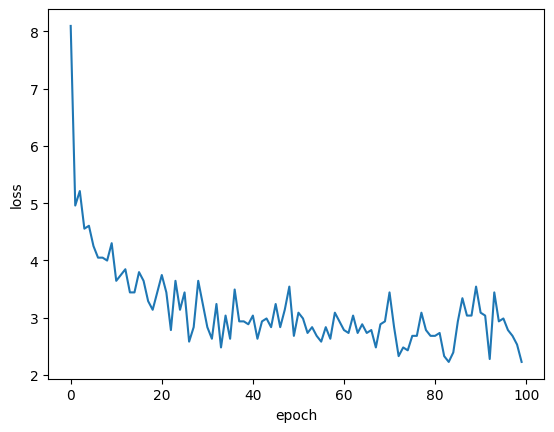

In [100]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [101]:
print(len(layer.losses))
print(type(layer.losses))
print(layer.losses[:3])
print(layer.losses[-3:])


100
<class 'list'>
[np.float64(8.097002515059364), np.float64(4.959414040344398), np.float64(5.212445368516357)]
[np.float64(2.6821320817050593), np.float64(2.530313284729146), np.float64(2.226675690595472)]


## 04-7 사이킷런의 경사 하강법을 사용해 봅니다

In [102]:
from sklearn.linear_model import SGDClassifier

In [103]:
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [104]:
pred = sgd.predict(x_test)

In [105]:
y_test[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [106]:
# 총 일치 개수
total_match = sum(x == y for x, y in zip(pred, y_test))

# 0으로 일치
zero_match = sum(x == y == 0 for x, y in zip(pred, y_test))

# 1으로 일치
one_match = sum(x == y == 1 for x, y in zip(pred, y_test))

# 불일치
none_match = sum(x != y for x, y in zip(pred, y_test))

print("총 일치:", total_match)
print("0 일치:", zero_match)
print("1 일치:", one_match)
print("불 일치:", none_match)

총 일치: 95
0 일치: 38
1 일치: 57
불 일치: 19


In [107]:
y_test.shape

(114,)

In [108]:
pred.shape

(114,)